In [1]:
import pandas as pd
from PIL import Image
from skimage.transform import resize
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import seaborn as sns
import keras

In [2]:
# weather mapping function
def weatherName(i):
    if (i == 1):
        return "berembun"
    elif (i == 2):
        return "berkabut"
    elif (i == 3):
        return "hujan es"
    elif (i == 4):
        return "petir"
    elif (i == 5):
        return "hujan"
    elif (i == 6):
        return "pelangi"
    elif (i == 7):
        return "badai pasir"
    else:
        return "salju"

# weather code mapping function for data training
def weatherTrain(i):
    if (i < 200):
        return 1
    elif (i < 400):
        return 2
    elif (i < 600):
        return 3
    elif (i < 800):
        return 4
    elif (i < 1000):
        return 5
    elif (i < 1200):
        return 6
    elif (i < 1400):
        return 7
    else:
        return 8

# mapping for data training results (y_train)
y_train = np.array([weatherTrain(index) for index in range(0, 1600)], dtype=int)
y_train.reshape(-1,)
print(y_train.shape, y_train)


(1600,) [1 1 1 ... 8 8 8]


In [3]:
# data image preprocessing
# input training dataset to numpy array
dew = np.array([resize(np.array(Image.open('./Train/dew/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/dew')], dtype=float)

fogsmog = np.array([resize(np.array(Image.open('./Train/fogsmog/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/fogsmog')], dtype=float)

join = np.append(dew, fogsmog,  0)

hail = np.array([resize(np.array(Image.open('./Train/hail/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/hail')], dtype=float)

join = np.append(join, hail,  0)

lightning = np.array([resize(np.array(Image.open('./Train/lightning/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/lightning')], dtype=float)

join = np.append(join, lightning,  0)

rain = np.array([resize(np.array(Image.open('./Train/rain/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/rain')], dtype=float)

join = np.append(join, rain,  0)

rainbow = np.array([resize(np.array(Image.open('./Train/rainbow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/rainbow')], dtype=float)

join = np.append(join, rainbow,  0)

sandstorm = np.array([resize(np.array(Image.open('./Train/sandstorm/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/sandstorm')], dtype=float)

join = np.append(join, sandstorm,  0)

snow = np.array([resize(np.array(Image.open('./Train/snow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Train/snow')], dtype=float)

# X_train result
X_train = np.append(join, snow,  0)

# check data training shape
print(X_train.shape, y_train.shape)

(1600, 150, 200, 3) (1600,)


In [4]:
# cnn model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),  
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])


# using adam for optimizer function and sparse categorical crossentropy for loss function 
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
              
# using 20 epochs
history = cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
50/50 [==============================] - 26s 503ms/step - loss: 1.5074 - accuracy: 0.4750
Epoch 2/20
50/50 [==============================] - 22s 445ms/step - loss: 1.0775 - accuracy: 0.6356
Epoch 3/20
50/50 [==============================] - 22s 443ms/step - loss: 0.9199 - accuracy: 0.6944
Epoch 4/20
50/50 [==============================] - 23s 458ms/step - loss: 0.8246 - accuracy: 0.7400
Epoch 5/20
50/50 [==============================] - 22s 445ms/step - loss: 0.7157 - accuracy: 0.7638
Epoch 6/20
50/50 [==============================] - 23s 458ms/step - loss: 0.6320 - accuracy: 0.7844
Epoch 7/20
50/50 [==============================] - 22s 445ms/step - loss: 0.5965 - accuracy: 0.7975
Epoch 8/20
50/50 [==============================] - 22s 449ms/step - loss: 0.5274 - accuracy: 0.8219
Epoch 9/20
50/50 [==============================] - 22s 447ms/step - loss: 0.4691 - accuracy: 0.8531
Epoch 10/20
50/50 [==============================] - 22s 445ms/step - loss: 0.4437 - accura

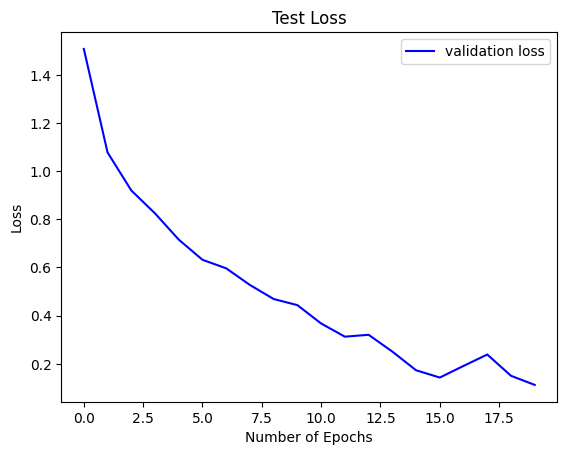

In [5]:
# evaluate loss
plt.plot(history.history['loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [6]:
# weather code mapping function for data testing
def weatherTest(i):
    if (i < 20):
        return 1
    elif (i < 40):
        return 2
    elif (i < 60):
        return 3
    elif (i < 80):
        return 4
    elif (i < 100):
        return 5
    elif (i < 120):
        return 6
    elif (i < 140):
        return 7
    else:
        return 8

# mapping for data testing results (y_test)
y_test = np.array([weatherTest(index) for index in range(0, 160)], dtype=int)
y_test.reshape(-1,)
print(y_test.shape)
y_test

(160,)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8])

In [8]:
# data image preprocessing
# input testing dataset to numpy array
dew = np.array([resize(np.array(Image.open('./Test/dew/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/dew')], dtype=float)

fogsmog = np.array([resize(np.array(Image.open('./Test/fogsmog/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/fogsmog')], dtype=float)

gabung = np.append(dew, fogsmog,  0)

hail = np.array([resize(np.array(Image.open('./Test/hail/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/hail')], dtype=float)

gabung = np.append(gabung, hail,  0)

lightning = np.array([resize(np.array(Image.open('./Test/lightning/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/lightning')], dtype=float)

gabung = np.append(gabung, lightning,  0)

rain = np.array([resize(np.array(Image.open('./Test/rain/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/rain')], dtype=float)

gabung = np.append(gabung, rain,  0)

rainbow = np.array([resize(np.array(Image.open('./Test/rainbow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/rainbow')], dtype=float)

gabung = np.append(gabung, rainbow,  0)

sandstorm = np.array([resize(np.array(Image.open('./Test/sandstorm/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/sandstorm')], dtype=float)

gabung = np.append(gabung, sandstorm,  0)

snow = np.array([resize(np.array(Image.open('./Test/snow/' + filename)) ,(150,200,3)) for filename in os.listdir('./Test/snow')], dtype=float)

# X_test result
X_test = np.append(gabung, snow,  0)

# check data testing shape
print(X_test.shape, y_test.shape)

(160, 150, 200, 3) (160,)
